## Making an API key for the medium articles dataset, and downloading the dataset

In [ ]:
! pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                                title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                              Data Science Salaries 2023 💸                       25KB  2023-04-13 09:55:16          10594        284  1.0              
asahu40/walmart-data-analysis-and-forcasting                       Walmart Data Analysis and Forcasting              122KB  2023-04-26 07:07:03           1456         34  1.0              
ahmedshahriarsakib/usa-real-estate-dataset                         USA Real Estate Dataset                             1MB  2023-04-30 03:51:36           1195         33  1.0              
iammustafatz/diabetes-prediction-dataset               

In [ ]:
! kaggle datasets download -d dorianlazar/medium-articles-dataset

100% 1.33G/1.33G [01:20<00:00, 17.8MB/s]
100% 1.33G/1.33G [01:20<00:00, 17.7MB/s]


In [ ]:
! mkdir dataset

In [ ]:
!unzip /content/medium-articles-dataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/images/2249.jpeg  
  inflating: dataset/images/225.png  
  inflating: dataset/images/2250.jpeg  
  inflating: dataset/images/2251.jpg  
  inflating: dataset/images/2252.jpeg  
  inflating: dataset/images/2253.jpeg  
  inflating: dataset/images/2254.jpg  
  inflating: dataset/images/2255.jpg  
  inflating: dataset/images/2256.png  
  inflating: dataset/images/2257.jpeg  
  inflating: dataset/images/2258.jpeg  
  inflating: dataset/images/2259.jpg  
  inflating: dataset/images/226.jpeg  
  inflating: dataset/images/2260.jpeg  
  inflating: dataset/images/2261.jpeg  
  inflating: dataset/images/2262.jpg  
  inflating: dataset/images/2263.jpg  
  inflating: dataset/images/2264.jpg  
  inflating: dataset/images/2265.jpeg  
  inflating: dataset/images/2266.jpg  
  inflating: dataset/images/2267.jpeg  
  inflating: dataset/images/2268.jpeg  
  inflating: dataset/images/2269.jpeg  
  inflating: dataset/images/227.jpg  
  i

##Using the dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import pickle

In [ ]:
medium_data = pd.read_csv('/content/dataset/medium_data.csv')
medium_data.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [ ]:
print("Number of records: ", medium_data.shape[0])
print("Number of fields: ", medium_data.shape[1])

Number of records:  6508
Number of fields:  10


In [ ]:
medium_data['title']

0       A Beginner’s Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” — How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6508, dtype: object

In [ ]:
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace(u'\xa0',u' '))
medium_data['title'] = medium_data['title'].apply(lambda x: x.replace('\u200a',' '))

## Tokenization

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<oov>') 
tokenizer.fit_on_texts(medium_data['title'])
total_words = len(tokenizer.word_index) + 1

print("Total number of words: ", total_words)
print("Word: ID")
print("------------")
print("<oov>: ", tokenizer.word_index['<oov>'])
print("Strong: ", tokenizer.word_index['strong'])
print("And: ", tokenizer.word_index['and'])
print("Consumption: ", tokenizer.word_index['consumption'])

Total number of words:  8238
Word: ID
------------
<oov>:  1
Strong:  4
And:  8
Consumption:  8237


In [ ]:
input_sequences = []
for line in medium_data['title']:
    token_list = tokenizer.texts_to_sequences([line])[0]
    #print(token_list)
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# print(input_sequences)
print("Total input sequences: ", len(input_sequences))

Total input sequences:  48461


In [ ]:
print(input_sequences)

[[5, 676], [5, 676, 68], [5, 676, 68, 2], [5, 676, 68, 2, 452], [5, 676, 68, 2, 452, 1518], [5, 676, 68, 2, 452, 1518, 14], [5, 676, 68, 2, 452, 1518, 14, 2455], [5, 676, 68, 2, 452, 1518, 14, 2455, 3653], [5, 676, 68, 2, 452, 1518, 14, 2455, 3653, 99], [1858, 23], [1858, 23, 741], [1858, 23, 741, 81], [1858, 23, 741, 81, 103], [1858, 23, 741, 81, 103, 14], [1858, 23, 741, 81, 103, 14, 345], [1858, 23, 741, 81, 103, 14, 345, 345], [1858, 23, 741, 81, 103, 14, 345, 345, 1859], [7, 2], [7, 2, 67], [7, 2, 67, 3654], [7, 2, 67, 3654, 9], [7, 2, 67, 3654, 9, 40], [3655, 7], [3655, 7, 2], [3655, 7, 2, 266], [3655, 7, 2, 266, 1283], [3655, 7, 2, 266, 1283, 9], [3655, 7, 2, 266, 1283, 9, 2456], [3655, 7, 2, 266, 1283, 9, 2456, 23], [3655, 7, 2, 266, 1283, 9, 2456, 23, 10], [3655, 7, 2, 266, 1283, 9, 2456, 23, 10, 938], [3655, 7, 2, 266, 1283, 9, 2456, 23, 10, 938, 222], [5, 192], [5, 192, 64], [5, 192, 64, 192], [5, 192, 64, 192, 485], [5, 192, 64, 192, 485, 6], [5, 192, 64, 192, 485, 6, 1860]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))
input_sequences[1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 676,
        68], dtype=int32)

## Creating features and labels

In [ ]:
x, labels = input_sequences[:,:-1],input_sequences[:,-1]
y = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [ ]:
print(x[5])
print(labels[5])
print(y[5][14])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    5  676   68    2  452 1518]
14
1.0


## Building a model

In [ ]:
#downloading the GloVe embedder
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2023-05-09 15:41:05--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2023-05-09 15:41:05--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-05-09 15:41:06--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [ ]:
# create embedding matrix
embedding_dim = 100
embedding_matrix = np.zeros((total_words, embedding_dim))
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        word, *vector = line.split()
        if word in tokenizer.word_index:
            idx = tokenizer.word_index[word]
            embedding_matrix[idx] = np.array(vector, dtype=np.float32)[:embedding_dim]

In [ ]:
from tensorflow.keras.layers import LSTM
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=total_words, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_len-1, trainable=False),
    LSTM(1000, return_sequences=True),
    LSTM(1000),
    tf.keras.layers.Dense(1000, activation='relu'),
    tf.keras.layers.Dense(total_words, activation='softmax')
])
model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
              metrics = ["accuracy"])

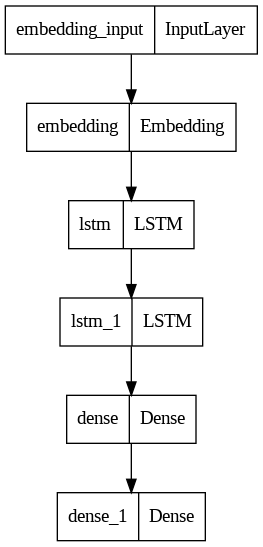

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 39, 100)           823800    
                                                                 
 lstm (LSTM)                 (None, 39, 1000)          4404000   
                                                                 
 lstm_1 (LSTM)               (None, 1000)              8004000   
                                                                 
 dense (Dense)               (None, 1000)              1001000   
                                                                 
 dense_1 (Dense)             (None, 8238)              8246238   
                                                                 
Total params: 22,479,038
Trainable params: 21,655,238
Non-trainable params: 823,800
_________________________________________________________________


In [ ]:
history = model.fit(x, y, epochs=50, verbose=1)

Epoch 1/50
1515/1515 [==============================] - 76s 44ms/step - loss: 7.0380 - accuracy: 0.0664
Epoch 2/50
1515/1515 [==============================] - 69s 46ms/step - loss: 6.6171 - accuracy: 0.0985
Epoch 3/50
1515/1515 [==============================] - 69s 46ms/step - loss: 6.2827 - accuracy: 0.1186
Epoch 4/50
1515/1515 [==============================] - 69s 45ms/step - loss: 5.9924 - accuracy: 0.1331
Epoch 5/50
1515/1515 [==============================] - 69s 45ms/step - loss: 5.7516 - accuracy: 0.1444
Epoch 6/50
1515/1515 [==============================] - 69s 45ms/step - loss: 5.5457 - accuracy: 0.1516
Epoch 7/50
1515/1515 [==============================] - 69s 45ms/step - loss: 5.3508 - accuracy: 0.1589
Epoch 8/50
1515/1515 [==============================] - 69s 46ms/step - loss: 5.1581 - accuracy: 0.1652
Epoch 9/50
1515/1515 [==============================] - 69s 46ms/step - loss: 4.9602 - accuracy: 0.1723
Epoch 10/50
1515/1515 [==============================] - 69s 45m

## Plotting the model accuracy and loss

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()

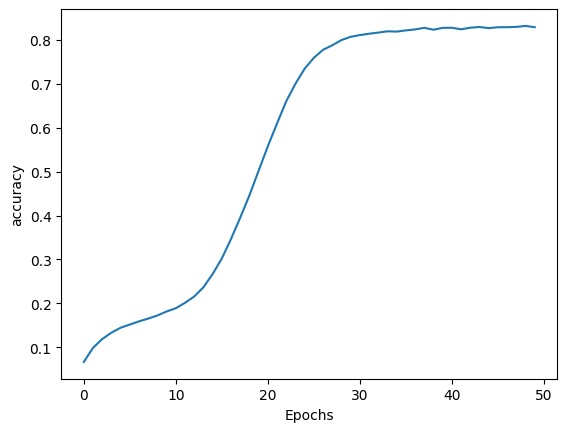

In [ ]:
plot_graphs(history, 'accuracy')

## Testing the model

In [ ]:
text = "My favourite book"
next_words = 20
  
for i in range(next_words):
    token_list = tokenizer.texts_to_sequences([text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predict_x=model.predict(token_list) 
    predicted=np.argmax(predict_x,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    text += " " + output_word
print(text)

1/1 [==============================] - 0s 19ms/step
My favourite book writing for the abusive flow of rejection made in the attempt decade behind with unimportant tasks rests fail in monetary


In [ ]:
pickle.dump(model,open("model.pkl","wb"))